In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('cars_info_preprocessed.csv')

**Câu hỏi:** *Kiểu dáng xe nào mà người dùng ưa thích nhất của từng hãng xe* (chỉ xét các hãng xe có số lượng xe > 100)

In [163]:
car_counts = df['Brand'].value_counts().rename_axis('Brand').reset_index(name='counts')

# Lấy số lượng xe > 100
car_counts = car_counts[car_counts['counts'] > 100]

Tạo dataframe mới chỉ có các hãng xe có số lượng > 100

In [170]:
df_copy = df.copy()
cars = car_counts['Brand'].values
cars_df = df_copy[df_copy['Brand'].isin(cars)].reset_index(drop=True)

Sau khi có được dataframe mới bao gồm các xe ta cần, tiếp tục tìm kiểu dáng xe ưa thích

In [171]:
# Đếm số lượng tất cả kiểu dáng xe của từng hãng
counting_car = cars_df.groupby(["Brand", "Type"]
                              ).agg({'Type':'count'}
                                   ).rename(columns={'Type':'Count'}
                                           ).reset_index()

In [194]:
# Sắp xếp số lượng xe theo giá trị giảm dần theo từng hãng xe
counting_car = counting_car.sort_values(['Brand','Count'], ascending=False)

# Lấy giá trị cao nhất của từng hãng xe
counting_car_max = counting_car.groupby('Brand').head(1).reset_index(drop=True)

# Sắp xếp các giá trị đó theo thứ tự giảm dần
counting_car_max = counting_car_max.sort_values('Count',ascending=False)

Sau khi có được dataframe bao gồm số lượng kiểu dáng xe nhiều nhất của từng hãng, ta vẽ biểu đồ để thể hiện rõ hơn

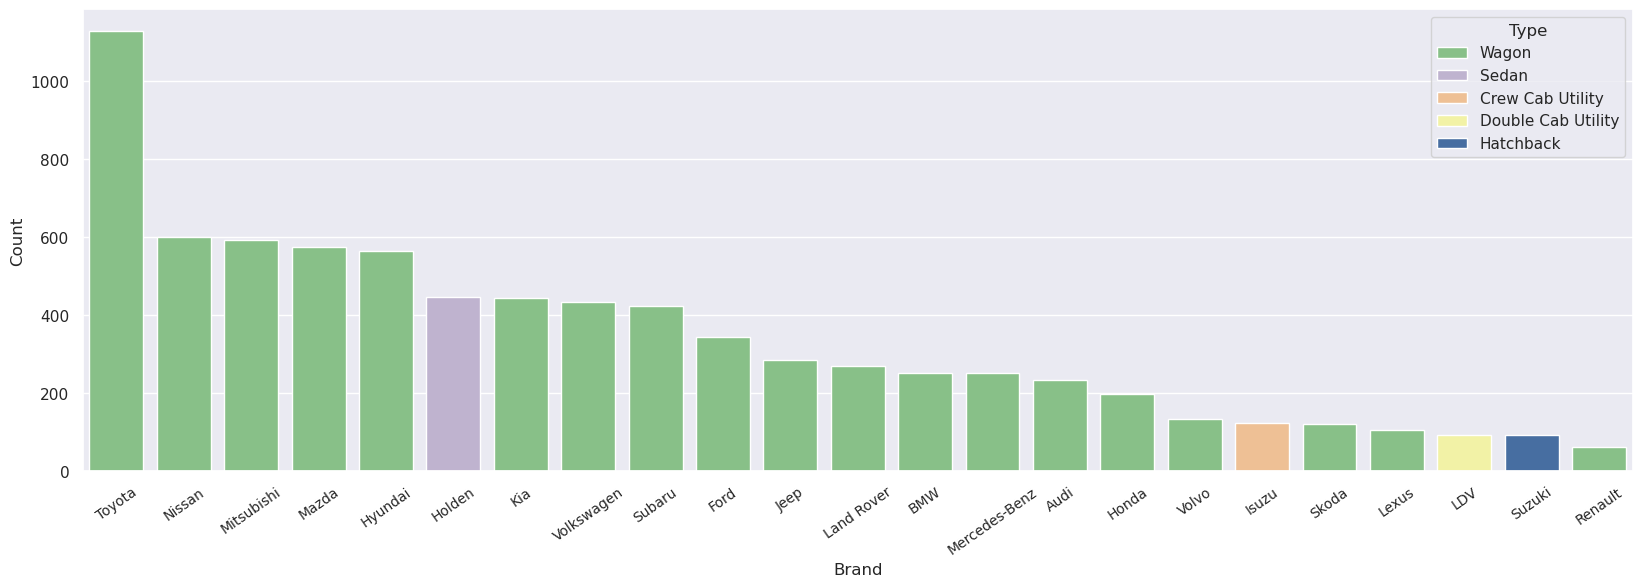

In [195]:
fig, axes = plt.subplots(figsize=(20,6))
sns.barplot(x='Brand',y='Count', hue='Type',data=counting_car_max,dodge=False)
x_tick = plt.xticks(fontsize=10,rotation=35)

Có vẻ kiểu dáng Wagon khá được nhiều người ưa chuộng ở mọi hãng xe